<a href="https://colab.research.google.com/github/duiliod/PI/blob/main/TP1_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deangeli Duilio Trabajo Practico 1 PI

In [56]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from skimage import data

In [57]:
#load an image
data = data.astronaut()
im1 = Image.fromarray(data)

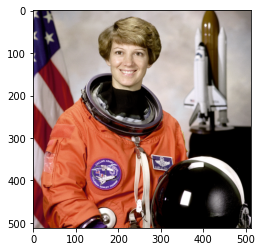

In [58]:
# plot of the image
plt.imshow(im1)
plt.show()

In [66]:
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

def rgb2yiq(img):
    return np.dot(img, RGB2YIQ.transpose())


YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

def yiq2rgb(img):
    OrigShape=img.shape
    return np.dot(img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)

def change_y(img, alfa):
    img[:,:,0] = img[:,:,0] * alfa  
    return img

def change_i(img, beta):
    img[:,:,1] = img[:,:,1] * beta  
    return img

def change_q(img, beta):
    img[:,:,2] = img[:,:,2] * beta  
    return img


In [84]:
assert 10 > 1, "Y is out of limit."

In [88]:
def limits_check(arr):
  assert np.max(arr[:,:,0]) < 1,"Y is out of limit."
  assert np.max(arr[:,:,1]) < 0.5957 or np.min(arr[:,:,1]) > -0.5957,"I is out of limit."
  assert np.max(arr[:,:,2]) < 0.5226 or np.min(arr[:,:,2]) > -0.5226,"Q is out of limit."


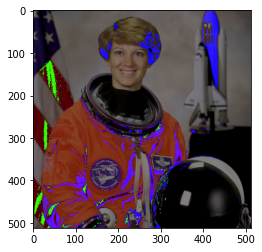

In [89]:
#@title Changing YIQ channels {run:"auto"}

def plot(alfa, beta, img):

  img_arr = np.asarray(img)
  arr_img = img_arr/255 #normalizo

  
  arr_img = rgb2yiq(arr_img) #paso a YIQ

  arr_img = change_y(arr_img,alfa) #cambio valores de Y
  arr_img = change_i(arr_img,beta) #cambio valores de I

  arr_img = change_q(arr_img,beta) #cambio valores de Q


  limits_check(arr_img)   #checkeo los limites 
 

  arr_img = yiq2rgb(arr_img)  #convierto a RGB

  arr_img = arr_img * 255
  img = Image.fromarray(np.uint8(arr_img))
  plt.imshow(img)
  

alfa = 0.5 #@param {type:"slider", min:0, max:1, step:0.1}
beta = 0.7 #@param {type:"slider", min:0, max:1, step:0.1}

plot(alfa,beta,im1)